# Risk Analysis & Customer Segmentation
In this notebook, we analyze customer churn risk using engineered behavioral and financial features.

Objectives:

- Identify high-risk customer segments
- Build simple risk scoring logic
- Segment customers into risk tiers
- Extract actionable business insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load engineered dataset
df = pd.read_csv("../data/engineered_bank_data.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (10127, 47)


,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Utilization_Category_Low,Utilization_Category_Medium
0,768805383,Existing Customer,45,3,39,5,1,3,12691.0,777,...,False,True,False,False,False,False,False,False,True,False
1,818770008,Existing Customer,49,5,44,6,1,2,8256.0,864,...,False,False,False,True,False,False,False,False,True,False
2,713982108,Existing Customer,51,3,36,4,1,0,3418.0,0,...,False,False,True,False,False,False,False,False,True,False
3,769911858,Existing Customer,40,4,34,3,4,1,3313.0,2517,...,False,False,False,True,False,False,False,False,False,True
4,709106358,Existing Customer,40,3,21,5,1,0,4716.0,0,...,False,True,False,False,False,False,False,False,True,False


## High Utilization Risk Analysis
Customers with high credit utilization may be financially stressed.

In [3]:
pd.crosstab(
    df['High_Utilization_Flag'], df['Churn_Binary'], normalize='index'
)

Churn_Binary,0,1
High_Utilization_Flag,,
0,0.841391,0.158609
1,0.797009,0.202991


## Inactivity Risk Analysis
Inactive customers may indicate disengagement.

In [4]:
pd.crosstab(
    df['Inactive_Customer_Flag'],
    df['Churn_Binary'],
    normalize='index'
)

Churn_Binary,0,1
Inactive_Customer_Flag,,
0,0.846006,0.153994
1,0.754410,0.245590


## Contact Frequency Risk Analysis
Frequent customer service contact may signal dissatisfaction.

In [5]:
pd.crosstab(
    df['High_Contact_Flag'],
    df['Churn_Binary'],
    normalize='index'
)

Churn_Binary,0,1
High_Contact_Flag,,
0,0.859024,0.140976
1,0.736128,0.263872


## Composite Risk Score Creation
We combine multiple behavioral risk indicators to create a simple risk score.

Risk Score Components:

- High Utilization
- High Contact Frequency
- Inactivity
- Low Transaction Activity

Each risk flag contributes 1 point.

In [7]:
# create low transaction flag (bottom 25%)
threshold = df['Total_Trans_Ct'].quantile(0.25)
df['Low_Transaction_Flag'] = np.where(
    df['Total_Trans_Ct'] <= threshold, 1, 0
)

# composite risk score 
df['Risk_Score'] = (
    df['High_Utilization_Flag'] +
    df['High_Contact_Flag'] +
    df['Inactive_Customer_Flag'] +
    df['Low_Transaction_Flag']
)

## Risk Tier Segmentation

We categorize customers into risk tiers:

- 0–1 → Low Risk
- 2 → Medium Risk
- 3–4 → High Risk

In [11]:
df['Risk_Tier'] = np.select([df['Risk_Score'] <= 1, df['Risk_Score'] == 2, df['Risk_Score'] >= 3],
                            ['Low Risk', 'Medium Risk', 'High Risk'],
                            default='Low Risk')
df['Risk_Tier'] = df['Risk_Tier'].astype('category')



## Churn Rate by Risk Tier
We evaluate whether higher risk tiers correspond to higher churn probability.

In [12]:
pd.crosstab(
    df['Risk_Tier'],
    df['Churn_Binary'],
    normalize='index'
)

Churn_Binary,0,1
Risk_Tier,,
High Risk,0.431818,0.568182
Low Risk,0.868424,0.131576
Medium Risk,0.569930,0.430070


## Risk Distribution Visualization



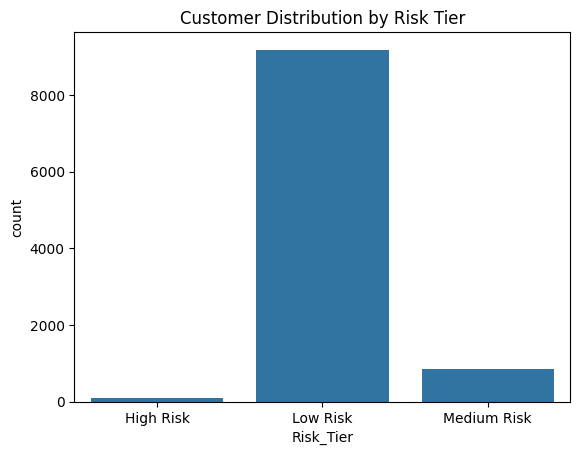

In [13]:
plt.figure()
sns.countplot(x='Risk_Tier', data=df)
plt.title("Customer Distribution by Risk Tier")
plt.show()

## Final Risk Analysis Summary
Key Findings:

- Customers with high utilization exhibit elevated churn probability.
- Increased inactivity strongly correlates with attrition.
- Frequent service contact signals dissatisfaction risk.
- Composite risk score effectively separates high-risk customers.
- High-risk tier customers demonstrate significantly higher churn rates.

Business Recommendations:

- Target high-risk customers with retention campaigns.
- Monitor customers crossing 80% utilization threshold.
- Engage inactive customers proactively.
- Reduce friction in customer service interactions.

This risk segmentation framework can support proactive churn prevention strategie

In [14]:
df.to_csv("risk_segmented_data.csv", index=False)